In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [20]:
img = cv.imread('assets/soccer_practice.jpg', 0)
img_stretched = cv.imread('assets/soccer_practice_stretched.jpg', 0)

template = cv.imread('assets/ball.png', 0)
template2 = cv.imread('assets/ball_rotated.png', 0)

In [16]:
def template_match(img, template):
  h, w = template.shape
  methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

  for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    res = cv.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # Determine the top left corner of the rectangle
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
      top_left = min_loc
    else:
      top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # Draw the rectangle on the main image
    cv.rectangle(img2, top_left, bottom_right, 255, 10)

    plt.figure()
    plt.subplot(121),plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img2, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

  # Show all plots
  plt.show()

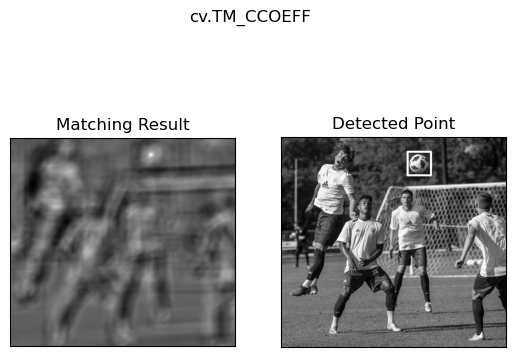

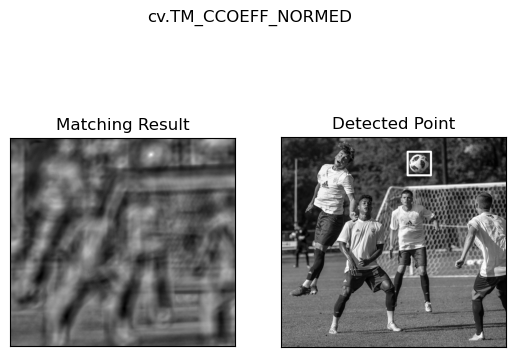

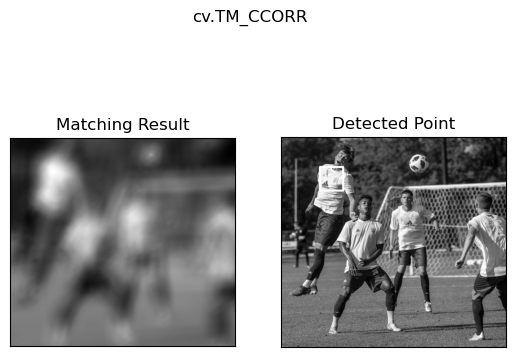

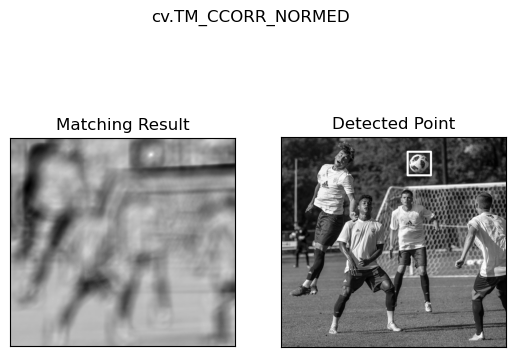

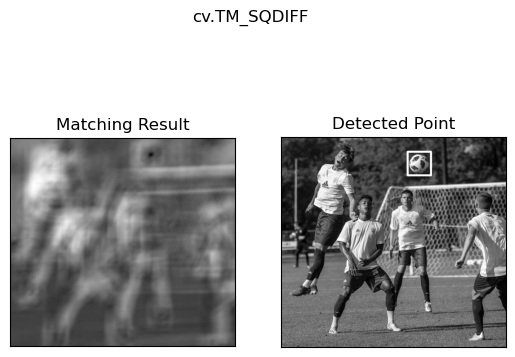

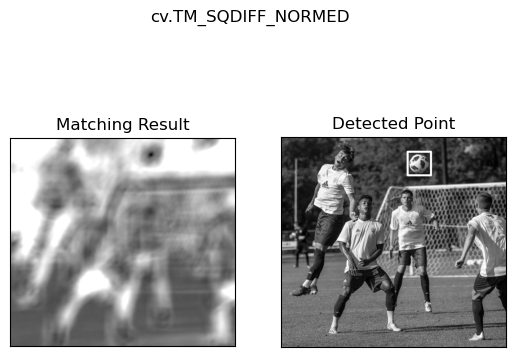

In [17]:
template_match(img,template)

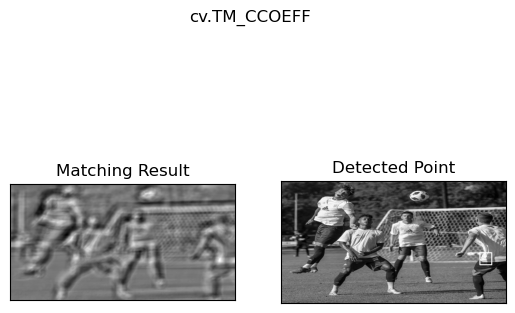

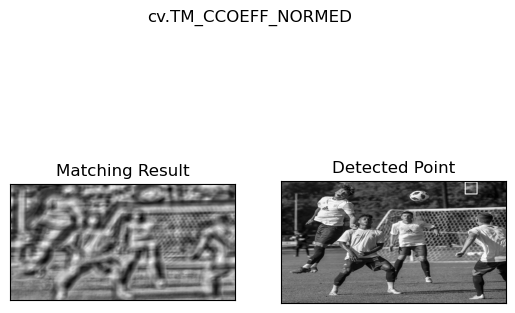

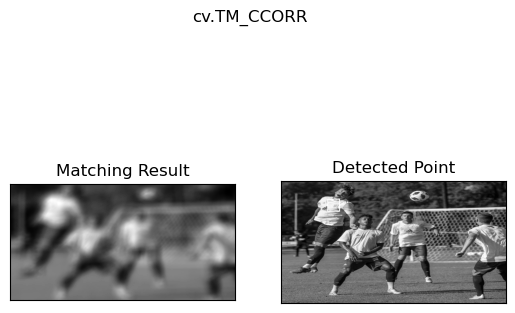

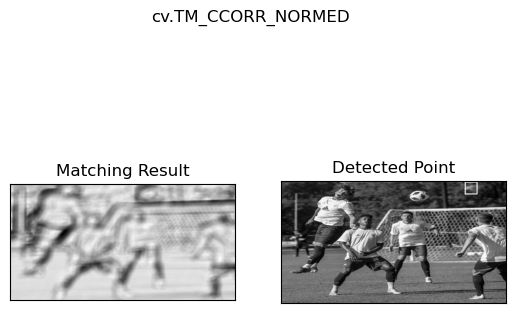

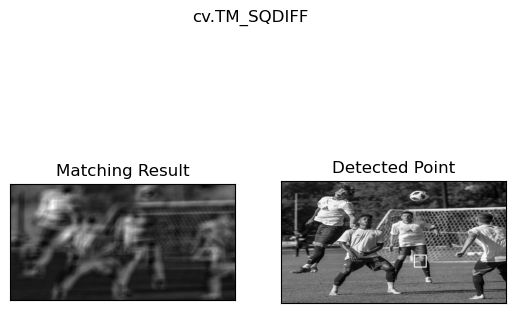

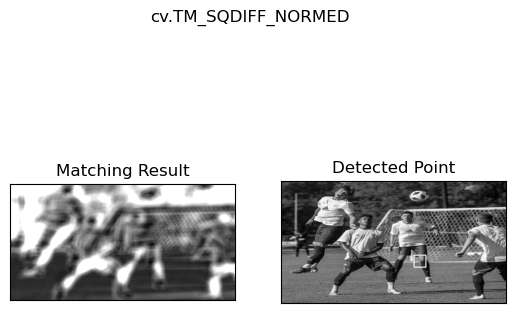

In [18]:
template_match(img_stretched,template)

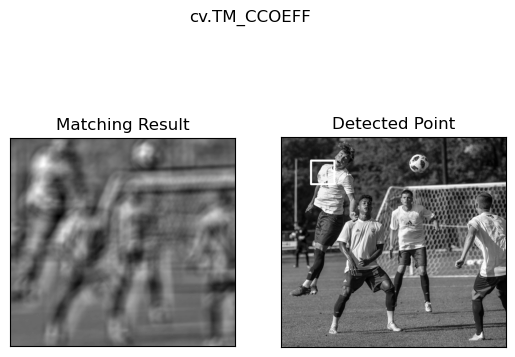

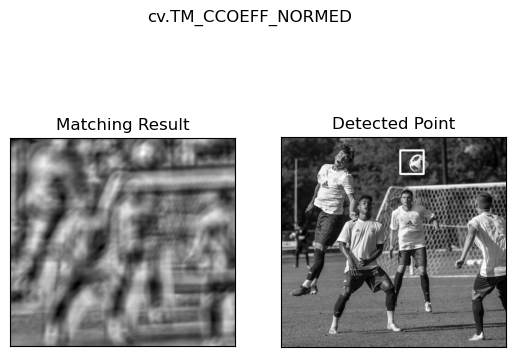

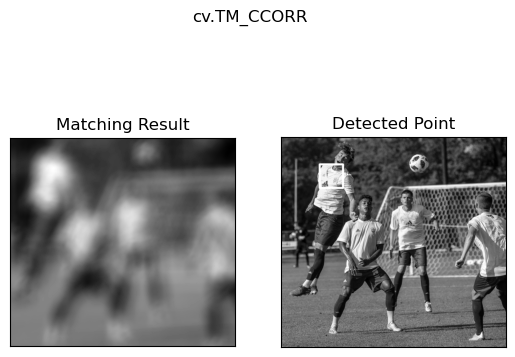

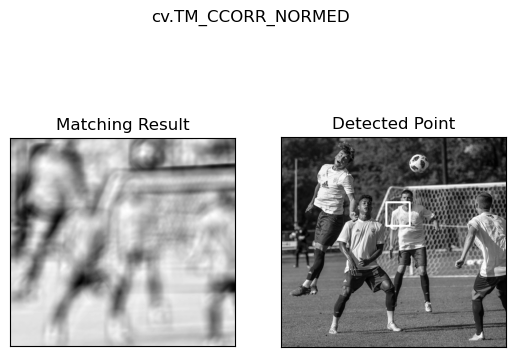

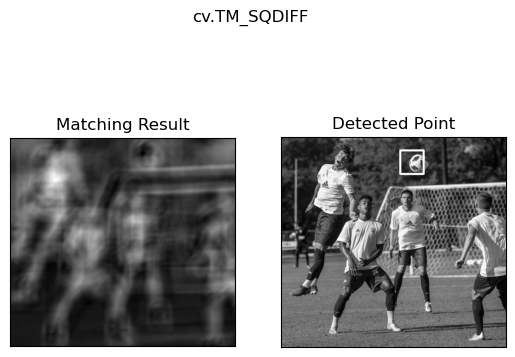

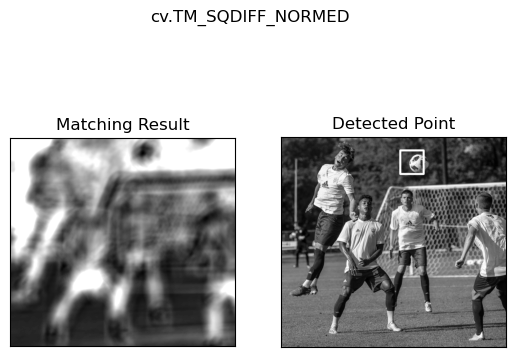

In [21]:
template_match(img,template2)